<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/02%20index%20funds%20perfomance.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

You can run the code examples in [Google Colab](https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/02%20index%20funds%20perfomance.ipynb).

**To install the package:**

In [ ]:
!pip install okama

import okama and matplotlib packages ...

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

**AssetList** has a set of methods usefull to track perfomance of index funds and compare them with benchmarks:
- tracking difference
- tracking error
- beta
- rolling and cumulative correlations

### Tracking difference

Tracking diffrenece is calculated by measuring the difference between the accumulated return of an index and those of the ETFs replicating it.

Let's compare main S&P500 ETFs.

In [2]:
symbols = ['SP500TR.INDX', 'SPY.US', 'VOO.US', 'IVV.US']  # the benchmark symbol should be in the first place
sp = ok.AssetList(symbols)
sp

assets           [SP500TR.INDX, SPY.US, VOO.US, IVV.US]
currency                                            USD
first_date                                      2010-10
last_date                                       2021-08
period_length                       10 years, 11 months
inflation                                      USD.INFL
dtype: object

In [3]:
sp.names

{'SP500TR.INDX': 'S&P 500 (TR)',
 'SPY.US': 'SPDR S&P 500 ETF Trust',
 'VOO.US': 'Vanguard S&P 500 ETF',
 'IVV.US': 'iShares Core S&P 500 ETF'}

We can check the general tracking difference as a difference in their accumulated return.

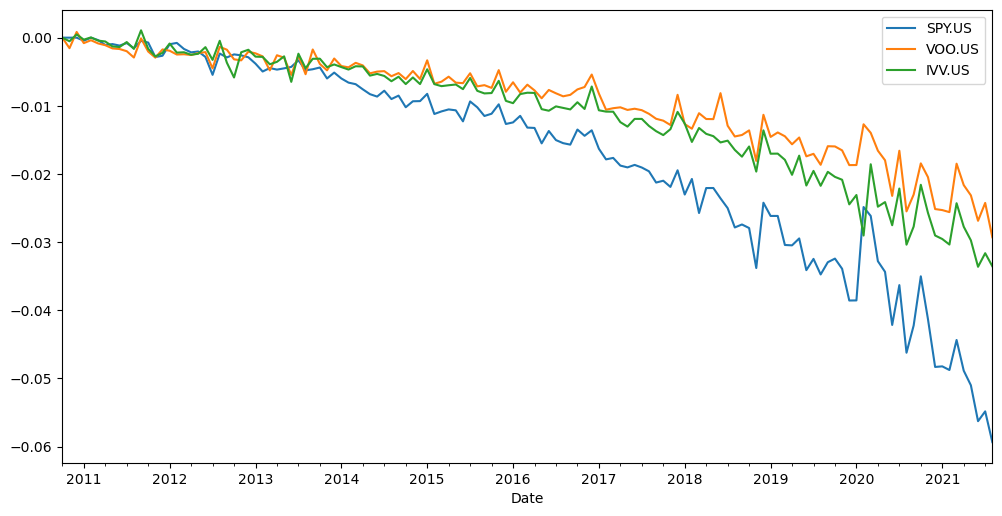

In [4]:
sp.tracking_difference.plot();

... or see annualized values.

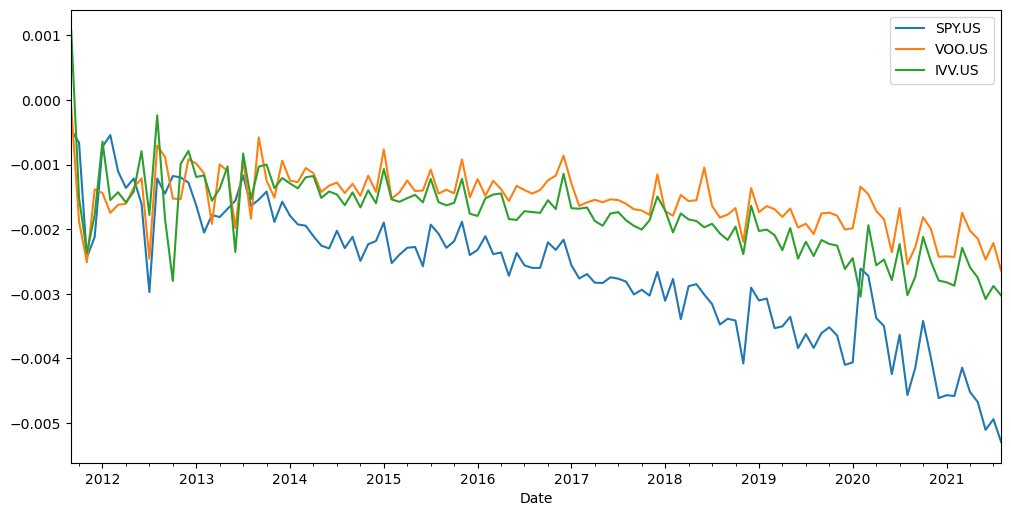

In [5]:
sp.tracking_difference_annualized.plot();

### Tracking Error

Tracking Error is the standard deviation of the difference between the ETF and index returns.

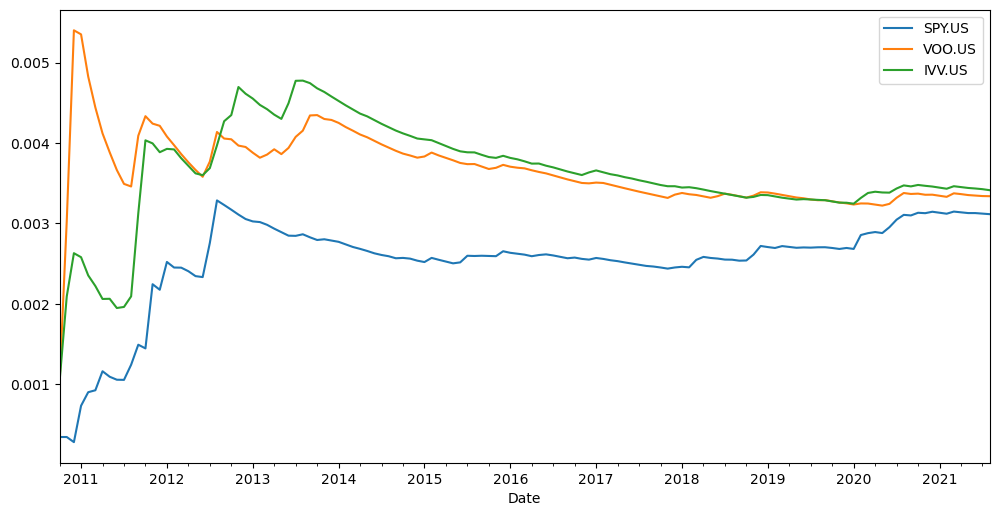

In [6]:
sp.tracking_error.plot();

### Beta

Another popular parameter for index funds is their beta.  
The beta (β) of an asset (i.e. a stock) is a measurement of its volatility of returns relative to the entire market.

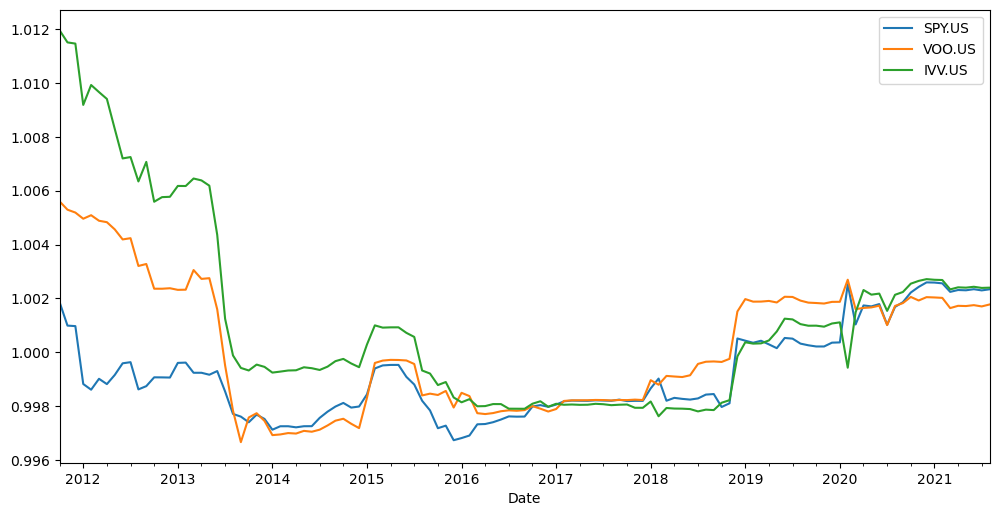

In [7]:
sp.index_beta.plot();  # in this example as expected beta is close to 1. Each ETF represents broad market in form of S&P 500 index

... we see here that all 3 funds have similar (high) beta.

### Correlation with index

Sometimes it's useful to check the correlation between different asset types.

In this example we verify the correlation:  

- US stocks (S&P 500 index)
- US bonds (Vanguard mutual fund)
- gold (spot prices) 
- US Real Estate (REIT ETF)

In [8]:
assets = ['SP500TR.INDX', 'VBMFX.US', 'GC.COMM', 'VNQ.US']  # GC.COMM - gold spot prices
x = ok.AssetList(assets)
x

assets           [SP500TR.INDX, VBMFX.US, GC.COMM, VNQ.US]
currency                                               USD
first_date                                         2004-10
last_date                                          2021-08
period_length                          16 years, 11 months
inflation                                         USD.INFL
dtype: object

In [9]:
x.names

{'SP500TR.INDX': 'S&P 500 (TR)',
 'VBMFX.US': 'VANGUARD TOTAL BOND MARKET INDEX FUND INVESTOR SHARES',
 'GC.COMM': 'Gold',
 'VNQ.US': 'Vanguard Real Estate Index Fund ETF Shares'}

It is possible to see as the correlation was changing during the period.  
`.index_corr` calculates expanding correlation with the benchmark.

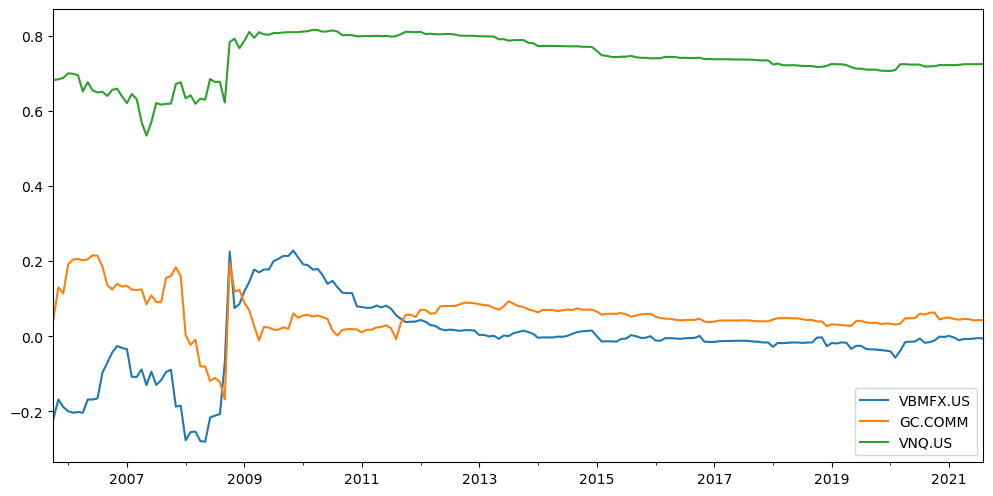

In [10]:
x.index_corr.plot();

Sometimes it's better to verify the **rolling correlation** with the benchmark (S&P 500 Total Return index).   
Rolling period size is set with window attribute in moths.

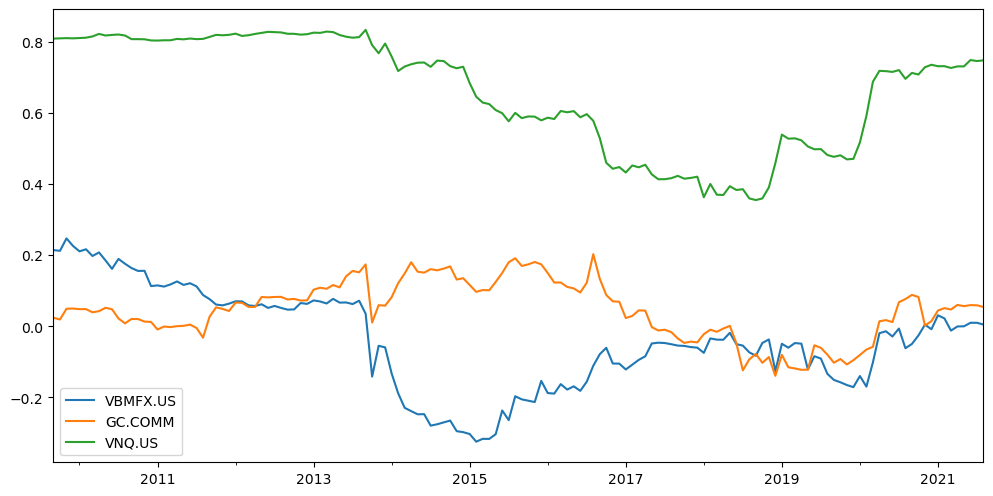

In [11]:
x.index_rolling_corr(window=12*5).plot();

It can be clearly seen that real estat ETF (VNQ) has higher correlation with stocks comparing with gold prices and bonds during this period.